<a href="https://colab.research.google.com/github/saikirananugam/NLP/blob/main/AES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
X = pd.read_csv('OS2931.csv',encoding="ISO-8859-1")

In [24]:
lis=X['Reviewer-1'].tolist()

In [4]:
d=X.Response

In [5]:
d

0       An operating system (OS) is system software th...
1       An operating system is the most important soft...
2       Collection of programs that manages hardware r...
3           It is an interface user and machine(hardware)
4       An operating system is a software which acts a...
                              ...                        
2385    Single processor contains only one processer.w...
2386    Single processor systems are less reliable tha...
2387    Single processor system contains only one proc...
2388    Single processor can assign only one task but ...
2389    Single Processor\n-> Uses a single cpu\n-> Eas...
Name: Response, Length: 2390, dtype: object

In [7]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.2 MB/s 
     |████████████████████████████████| 5.5 MB 16.5 MB/s 
     |████████████████████████████████| 1.3 MB 47.9 MB/s 
     |████████████████████████████████| 163 kB 45.6 MB/s 
     |████████████████████████████████| 7.6 MB 34.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4184ce8789231c48d626f6fb3829065d897a0bcce2322d810d45ca56d4d49e5c
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [8]:
from sentence_transformers import SentenceTransformer


In [9]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(d)


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [10]:
from sklearn.cluster import k_means
km=k_means(embeddings,6)

In [11]:
aaa=[km]

In [12]:
y_pred=aaa[0][1]

In [13]:
ans=y_pred

In [14]:
abc=[]
for i in ans:
    abc.append(i)

In [15]:
from sklearn.metrics import cohen_kappa_score

In [16]:
cohen_kappa_score(lis,abc)

0.016576113791810676

In [18]:
result=cohen_kappa_score(lis,abc,weights='quadratic')
print(result)


0.09624577645852728


In [19]:
import matplotlib.pyplot as mp

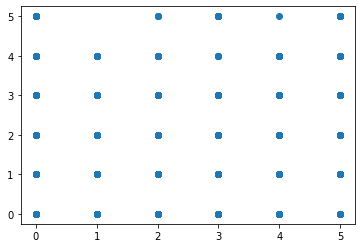

In [25]:
mp.scatter(abc,lis)

In [26]:
from scipy.cluster import  hierarchy
threshold = 0.1
Z = hierarchy.linkage(embeddings,"average", metric="cosine")
C = hierarchy.fcluster(Z, threshold, criterion="distance")
print(embeddings,Z,C)

[[-0.02357353 -0.01503747 -0.00397871 ...  0.02411804  0.0362772
   0.0074688 ]
 [-0.02846667  0.03639808  0.00822516 ...  0.03154779  0.01749238
  -0.00048567]
 [-0.00468063 -0.02878353 -0.03404774 ...  0.00117501 -0.02464179
   0.00338477]
 ...
 [-0.02753562 -0.01181827 -0.02199969 ... -0.03585221  0.05486577
  -0.01896431]
 [ 0.01241688 -0.06888344 -0.03817156 ... -0.02222495 -0.00727084
  -0.03246032]
 [-0.01234783 -0.00325741 -0.02912418 ... -0.04279251  0.02785357
  -0.00177822]] [[0.00000000e+00 6.00000000e+00 0.00000000e+00 2.00000000e+00]
 [2.59000000e+02 2.85000000e+02 0.00000000e+00 2.00000000e+00]
 [9.00000000e+00 2.39000000e+03 0.00000000e+00 3.00000000e+00]
 ...
 [4.73000000e+03 4.74900000e+03 8.64300949e-01 4.00000000e+00]
 [4.77400000e+03 4.77600000e+03 9.09938693e-01 2.36600000e+03]
 [4.77500000e+03 4.77700000e+03 9.64334096e-01 2.39000000e+03]] [736 734 831 ... 209 264 206]


In [29]:
from sklearn.metrics.pairwise import cosine_similarity
print(embeddings[1].shape)
print(cosine_similarity(embeddings[0].reshape(1,-1),embeddings[2].reshape(1,-1)))

(768,)
[[0.4490642]]


In [30]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

query_embedding = model.encode('An operating system (OS) is system software th')
passage_embedding = model.encode(['An operating system is the most important s',
                                  ' An operating system is a software which acts a.'])

print("Similarity:", util.dot_score(query_embedding, passage_embedding))

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/383 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Similarity: tensor([[0.6996, 0.8913]])


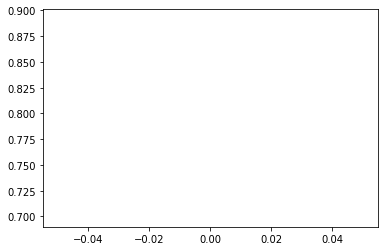

In [60]:
mp.plot(util.dot_score(query_embedding, passage_embedding))

In [32]:
!pip install ClusterTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ClusterTransformer: filename=ClusterTransformer-0.1-py3-none-any.whl size=4714 sha256=0bfc4e7d6dfb48fe0b00e46e20bde06f8f03d360f23d0d84153688ae05460fd4
  Stored in directory: /root/.cache/pip/wheels/8f/90/84/f5accb3e3232dc53cc601e4305f0f5168bc3eee31b5d6a3e32
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=a33a5bb0c96ed302cd47f690f40f15e22b11b783fa834c32f351d7bb6e382434
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built ClusterTransformer sklearn


In [33]:
import ClusterTransformer.ClusterTransformer as ctrans


In [34]:
cr=ctrans.ClusterTransformer()
model_name='bert-large-uncased'

In [36]:
print(cr)

In [37]:
from sklearn.cluster import KMeans

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

In [38]:
cluster_assignment

array([4, 4, 1, ..., 3, 3, 3], dtype=int32)

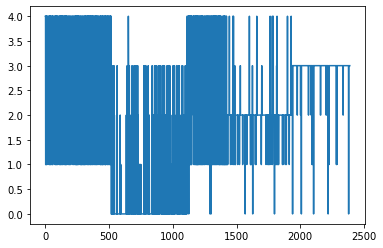

In [52]:
mp.plot(cluster_assignment)

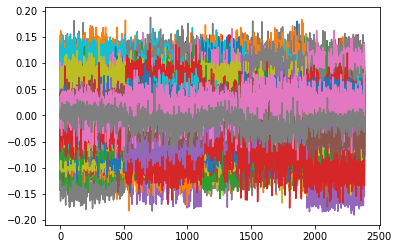

In [54]:
mp.plot(embeddings)

In [41]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(X['Reviewer-1'])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Streaming output truncated to the last 5000 lines.
2386    3
2387    2
2388    1
2389    2
Name: Reviewer-1, Length: 2390, dtype: int64, 0       4
1       5
2       2
3       2
4       3
       ..
2385    2
2386    3
2387    2
2388    1
2389    2
Name: Reviewer-1, Length: 2390, dtype: int64, 0       4
1       5
2       2
3       2
4       3
       ..
2385    2
2386    3
2387    2
2388    1
2389    2
Name: Reviewer-1, Length: 2390, dtype: int64, 0       4
1       5
2       2
3       2
4       3
       ..
2385    2
2386    3
2387    2
2388    1
2389    2
Name: Reviewer-1, Length: 2390, dtype: int64, 0       4
1       5
2       2
3       2
4       3
       ..
2385    2
2386    3
2387    2
2388    1
2389    2
Name: Reviewer-1, Length: 2390, dtype: int64, 0       4
1       5
2       2
3       2
4       3
       ..
2385    2
2386    3
2387    2
2388    1
2389    2
Name: Reviewer-1, Length: 2390, dtype: int64, 0       4
1       5
2       2
3       2
4       3
       ..
2385    2
2386    3
238

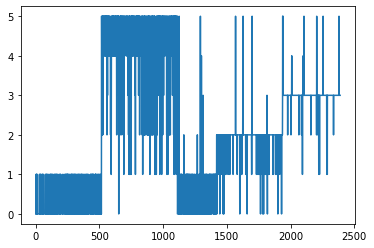

In [43]:
mp.plot(abc)

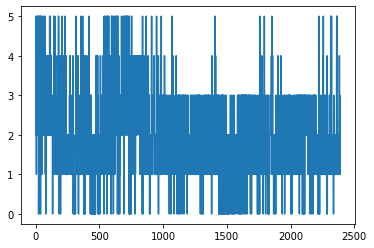

In [44]:
mp.plot(lis)

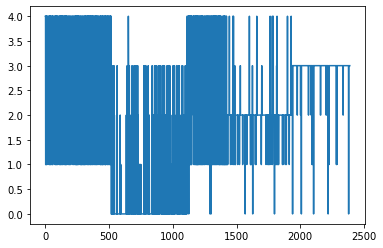

In [45]:
mp.plot(cluster_assignment)

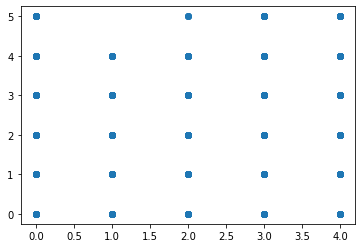

In [46]:
mp.scatter(cluster_assignment,lis)

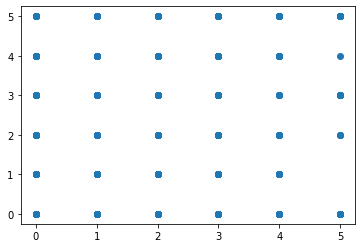

In [48]:
mp.scatter(lis,abc)

 ...]

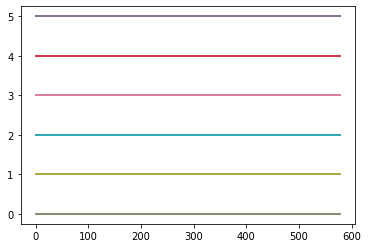

In [49]:
mp.plot(cluster)

ValueError: ignored

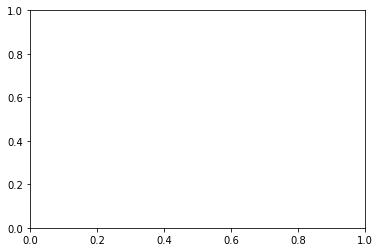

In [50]:
mp.scatter()